# Linear Congruential Random Number Generators

>A **linear congruential generator** (**LCG**) is an algorithm that yields a sequence of pseudo-randomized numbers calculated with a discontinuous piecewise linear function. The method represents one of the oldest and best-known pseudorandom number generator algorithms. The theory behind them is relatively easy to understand, and they are easily implemented and fast, especially on computer hardware which can provide modular arithmetic by storage-bit truncation.
>
>The generator is defined by the recurrence relation:
>$$X_{n+1} = \left( a X_n + c \right)\bmod m$$
>where $X$ is the sequence of pseudo-random values, and
>- $m,\, 0\lt m$ is the "modulus",
>- $a,\,0 \lt a \lt  m$ is the "multiplier",
>- $c,\,0 \le c \lt  m$ is the "increment",
>- $X_0,\,0 \le X_0 \lt  m$ is the "seed" or "start value",
>These are integer constants that specify the generator.
>If $c=0$, the generator is often called a "multiplicative congruential generator" (MCG), or *Lehmer RNG*.
>If $c≠0$, the method is called a "mixed congruential generator".
>
>[[Wikipedia](https://en.wikipedia.org/wiki/Linear_congruential_generator)]

### Tasks

- Create an LCG with your Student ID as the modulus $m$, and suitable random values for $a, c$, and the *seed*. (See starter code below.)
- Use Decision Tress (DTs) from the `scikit-learn` library to assess the quality of your chosen PRNG. (If it is easy to predict the next digits then it is less random.)
    - Select 3 hyper-parameters and study their effect.

Explain your reasoning, and justify any choices of the hyperparameters (and/or run experiments to find the optimal ones).

Evaluate your models, and use visualisation to show the trees and any relevant plots.

Write a conclusion that summarises your findings, and makes recommendations.

In [ ]:
from math import log
from random import randint
from matplotlib import pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestClassifier

## Initialisation of the LCG parameters

Assign suitable values to the fllowing variables.

In [ ]:
#.#.#.#.#.#.# IMPORTANT #.#.#.#.#.#.#

MODULUS = 16387836 # Set this to your Student ID

#.#.#.#.#.#.# IMPORTANT #.#.#.#.#.#.#

In [ ]:
A = 101
C = 13
SEED = 321

### Base $b$ representation of numbers

In [ ]:
def base_b(n, b):
    """ Get a list representing the number n written in base 'b' """
    bitlength = 1+int(log(MODULUS)/log(b))
    r = []
    for _ in range(bitlength):
        r.insert(0, n%b)
        n //= b
    return r

In [ ]:
base_b(11,3) # Example: 11 in base 3 is:   2+0*3+1*3^2   -->   102   -->   [0,0,...,1,0,2]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2]

## LCG

In [ ]:
def lcg(seed, modulus, a, c):
    """ Linear congruential generator: 𝑋_{𝑛+1} = (𝑎𝑋_𝑛+𝑐) mod 𝑚 """
    while True:
        seed = (a * seed + c) % modulus
        yield seed

In [ ]:
generator = lcg(SEED, MODULUS, A, C)

## Data generation

In [ ]:
stream = [next(generator) for _ in range(10_000)]
stream[:10] # Example

[32434,
 3275847,
 3103840,
 2118969,
 974014,
 48411,
 4889524,
 2206857,
 9850702,
 11650755]

In [ ]:
def get_features(stream, base):
    ''' Repalce each random number from 'stream' by a vector of its base b digits '''
    return [base_b(n, base) for n in stream]

In [ ]:
data = get_features(stream, base=3)

In [ ]:
stream[0], data[0] # Example

(32434, [0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1])

In [ ]:
X = data[:-1]
y = data[1:]
len(X), len(y)

(9999, 9999)

In [ ]:
X[0], y[0] # Example

([0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1],
 [0, 0, 2, 0, 0, 1, 1, 1, 0, 2, 1, 2, 1, 2, 0, 0])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
len(X_train), len(X_test)

(7499, 2500)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

clf = DecisionTreeClassifier(max_depth=5, criterion='gini', min_samples_split=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Calculate accuracy for multi-output targets
def partial_match_score(y_true, y_pred):
    total = 0
    count = 0
    for yt, yp in zip(y_true, y_pred):
        total += sum(yt_i == yp_i for yt_i, yp_i in zip(yt, yp))
        count += len(yt)
    return total / count

acc = partial_match_score(y_test, y_pred)
print(f"Average digit-level accuracy: {acc:.4f}")

Average digit-level accuracy: 0.4177


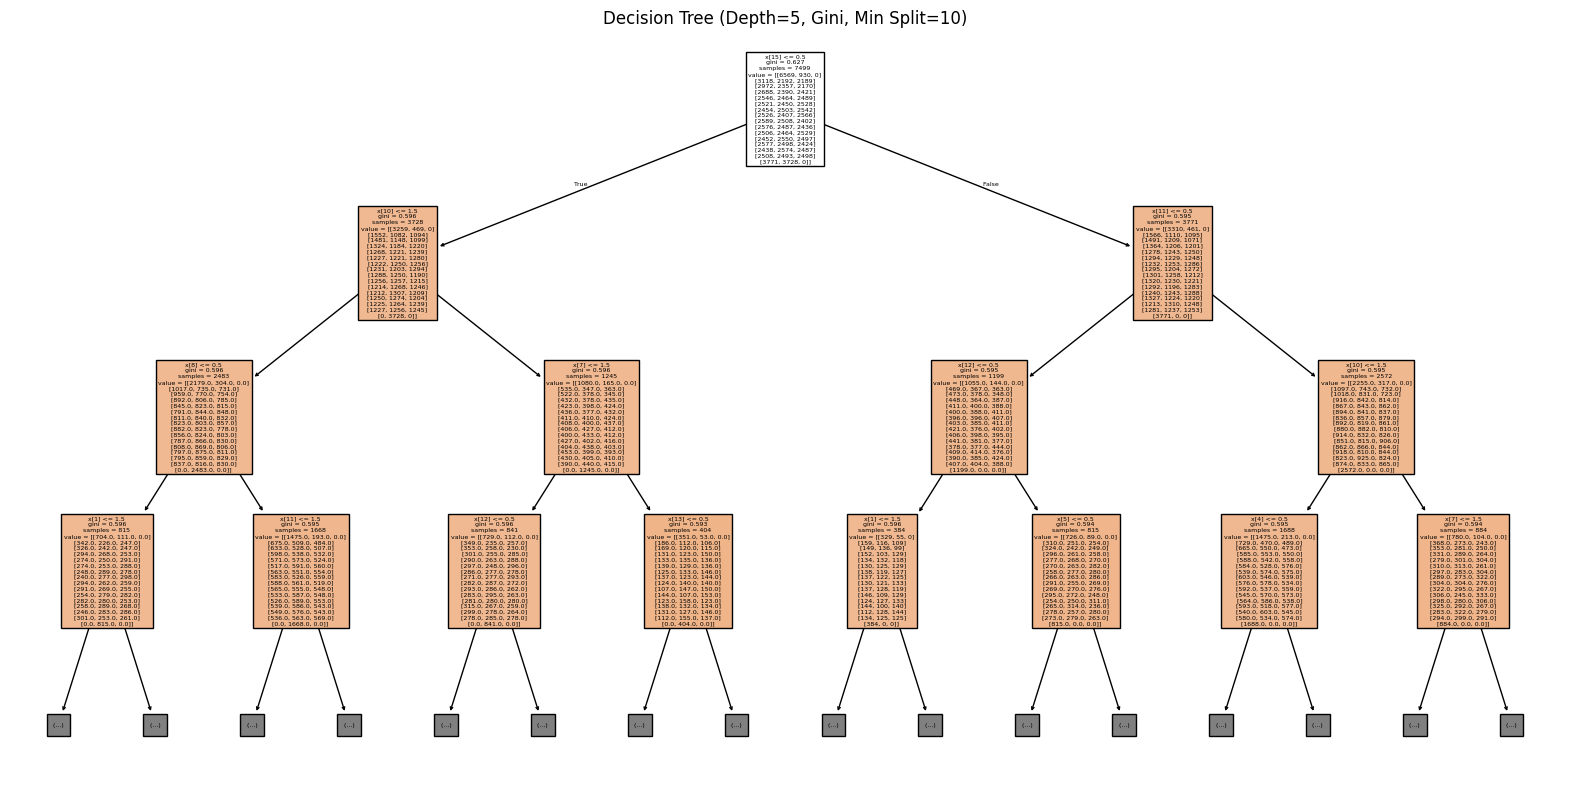

In [ ]:
from sklearn.tree import plot_tree # Import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, max_depth=3)
plt.title("Decision Tree (Depth=5, Gini, Min Split=10)")
plt.show()

In [ ]:
# Hyperparameter
import pandas as pd

results = []

depth_values = [3, 5, 10]
split_values = [2, 10, 20]
criteria = ['gini', 'entropy']

def partial_match_score(y_true, y_pred):
    total = 0
    count = 0
    for yt, yp in zip(y_true, y_pred):
        total += sum(yt_i == yp_i for yt_i, yp_i in zip(yt, yp))
        count += len(yt)
    return total / count

for max_depth in depth_values:
    for min_split in split_values:
        for criterion in criteria:
            clf = DecisionTreeClassifier(
                max_depth=max_depth,
                min_samples_split=min_split,
                criterion=criterion
            )
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)

            acc = partial_match_score(y_test, y_pred)

            results.append({
                'max_depth': max_depth,
                'min_samples_split': min_split,
                'criterion': criterion,
                'avg_digit_accuracy': acc
            })

# Convert to DataFrame
df = pd.DataFrame(results)
df.sort_values(by="avg_digit_accuracy", ascending=False).head()

,max_depth,min_samples_split,criterion,avg_digit_accuracy
7,5,2,entropy,0.419625
9,5,10,entropy,0.419625
11,5,20,entropy,0.419625
0,3,2,gini,0.419075
4,3,20,gini,0.419075


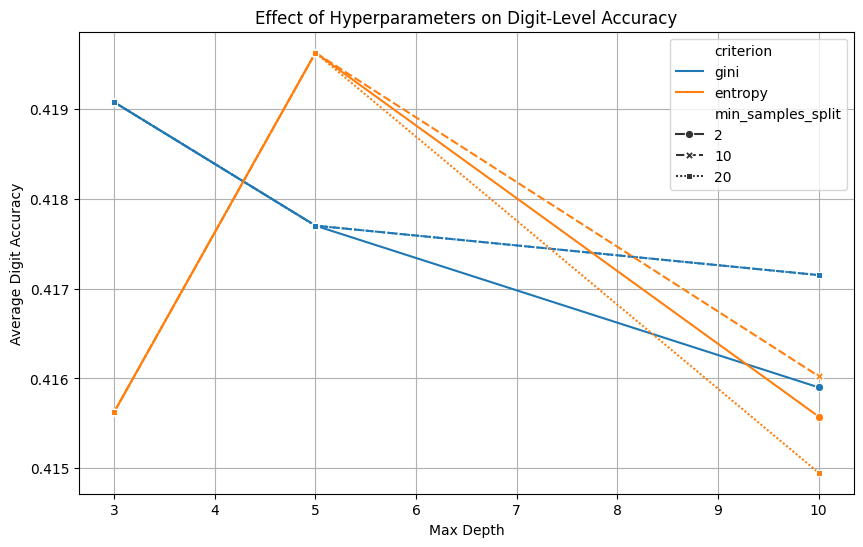

In [ ]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x="max_depth", y="avg_digit_accuracy", hue="criterion", style="min_samples_split", markers=True)
plt.title("Effect of Hyperparameters on Digit-Level Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Average Digit Accuracy")
plt.grid(True)
plt.show()

# Conclusion

The challenge was to test the quality of a pseudo-random number generator through a Linear Congruential Generator (LCG) through a Decision Tree classifier. To form the LCG the modulus m has been taken as the student ID 16387836, multiplier a = 101, increment c = 13, and seed 321. The formula applied was LCG:
X n+1 = (a X n + c) mod m,
which gave a sequence of 10000 pseudo-random numbers. To provide the input of the classification model, the numbers were changed into the base-3 representation. The next number base-3 representation was predicted using these features, thus the problem was posed as a multi-output classification problem.
This was aimed at evaluating the predictability of the subsequent numbers of the LCG sequence because high inaccuracy of prediction would imply lesser randomness. Hyperparameter values were used to train Decision Trees on the scikit-learn library. These were the three hyperparameters: max_depth, min_samples_split, and the criteria of splitting (gini or entropy). The dataset had been divided into training and testing with a common ratio of 75 to 25.
First, a Decision Tree was trained using max_depth=5, min_samples_split=10 and criterion='gini'. The resultant model was found to have an average accuracy level of prediction of 41.77%, that is, about 4 digits out of 10 digits in base-3 representation of the next number was predicted in a correct manner. This moderate value of accuracy states that the LCG is predictable but only to a certain amount, and has fairly much randomness as well.
A larger hyperparameter tuning experiment has been done using combinations of:

max_depth = [3, 5, 10]

min_samples_split = [2,10,20]

criterion = [gini, entropy]

All the best performing models shared the same criterion='entropy', with slightly better accuracy, of 41.96 per cent, between depths of 5 to 10 at varying min_samples_ split.


## References

***

### Foundational LCG & Random Number Generation Papers



1.  **Lehmer, D. H. (1951).** Mathematical methods in large-scale computing units. In *Proceedings of a Second Symposium on Large-Scale Digital Calculating Machinery* (pp. 141-146). Harvard University Press.   
    

2.  **Knuth, D. E. (1997).** *The Art of Computer Programming, Volume 2: Seminumerical Algorithms* (3rd ed.). Addison-Wesley Professional.  
    

3.  **L'Ecuyer, P. (1998).** Random number generation. In *Handbook of Simulation* (pp. 93-137). John Wiley & Sons.  
    

---

### Decision Trees & Scikit-Learn



4.  **Breiman, L., Friedman, J., Stone, C. J., & Olshen, R. A. (1984).** *Classification and Regression Trees*. CRC Press.  
   

5.  **Pedregosa, F., et al. (2011).** Scikit-learn: Machine Learning in Python. *Journal of Machine Learning Research*, 12, 2825-2830.  
   

---

### Evaluating PRNGs with Machine Learning




6.  **Wang, Z., & Nicol, D. M. (2011).** On using machine learning to assess pseudo-random number generators. In *Proceedings of the Winter Simulation Conference* (pp. 576-586). IEEE.  
